# Reading FITS spectra #

In [197]:
%%bash
curl -O https://raw.githubusercontent.com/astropy/specutils/master/specutils/io/tests/files/gbt_1d.fits
ls -lh gbt_1d.fits

-rw-r--r--+ 1 adam staff 40K Mar 17 12:12 gbt_1d.fits


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  56047      0 --:--:-- --:--:-- --:--:-- 56000


In [198]:
ls -lh gbt_1d.fits

-rw-r--r--+ 1 adam 40K Mar 17 12:12 gbt_1d.fits


In [13]:
pwd

'/Users/adam/Dropbox/eso_python_2016'

In [14]:
!pwd

/Users/adam/work/teaching/eso_python_2016


In [17]:
!ls -lh gbt_1d.fits

-rw-r--r--+ 1 adam staff 40K Mar 17 11:05 gbt_1d.fits


In [19]:
from astropy.io import fits

In [54]:
fh = fits.open('gbt_1d.fits')
header = fits.getheader('gbt_1d.fits')
data = fits.getdata('gbt_1d.fits')

In [55]:
len(fh)

1

In [23]:
fh[0]

In [26]:
fh[0].data.shape

(4096,)

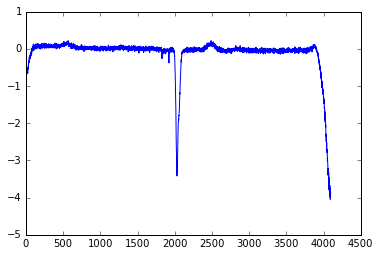

In [28]:
%matplotlib inline
import pylab as pl
pl.plot(fh[0].data)

In [44]:
hdr = fh[0].header

In [59]:
d = {'a' : (1,2,3), 'b': 2}

In [60]:
d['a'][0]

1

In [61]:
d[0] # not valid!

KeyError: 0

In [62]:
hdr['NAXIS1']

4096

In [63]:
data.size

4096

In [31]:
xarr_pixels = np.arange(hdr['NAXIS1'])
xarr_pixels

array([   0,    1,    2, ..., 4093, 4094, 4095])

In [65]:
cdelt = hdr['CDELT1'] # spacing between pixels
crval = hdr['CRVAL1'] # reference coordinate
crpix = hdr['CRPIX1'] # pixel of the reference coordinate
cunit = hdr['CUNIT1']

In [66]:
cdelt, crval, crpix, cunit

(-0.25258831, 7.5845751, 2049.0, 'km/s')

In [33]:
# +1 because FITS is 1-indexed, python is 0-indexed
xarr = (xarr_pixels - crpix + 1)*cdelt + crval

In [39]:
cunit

'km/s'

In [40]:
xarr

array([ 524.88543398,  524.63284567,  524.38025736, ..., -508.95851885,
       -509.21110716, -509.46369547])

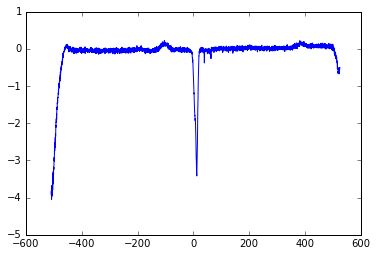

In [41]:
pl.plot(xarr, fh[0].data)

In [67]:
from astropy import units as u

In [68]:
u.km/u.s

Unit("km / s")

In [71]:
xarr_u = xarr * u.km/u.s
xarr_u

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [72]:
xarr_u.to(u.m/u.s)

<Quantity [ 524885.43398, 524632.84567, 524380.25736,..., -508958.51885,
           -509211.10716,-509463.69547] m / s>

In [75]:
xarr_u = xarr * u.Unit(hdr['CUNIT1'])
xarr_u

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [77]:
type(u.m), type(xarr_u)

(astropy.units.core.IrreducibleUnit, astropy.units.quantity.Quantity)

In [78]:
xarr_u.cgs

<Quantity [ 52488543.398     , 52463284.567     , 52438025.73599999,...,
           -50895851.885     ,-50921110.71599999,-50946369.547     ] cm / s>

In [80]:
xarr_u.si

<Quantity [ 524885.43398, 524632.84567, 524380.25736,..., -508958.51885,
           -509211.10716,-509463.69547] m / s>

In [82]:
(500*u.M_jup/u.yr).to(u.g/u.s)

<Quantity 3.0083086166248377e+25 g / s>

In [83]:
from astropy import constants

In [85]:
# how many protons in earth?
constants.M_earth / constants.m_p

<Quantity 3.571757872670577e+51>

In [89]:
xarr_u.unit.to_string(format='latex')

'$\\mathrm{\\frac{km}{s}}$'

In [91]:
xarr_u.unit.to_string()

'km / s'

In [92]:
np.cos(5*u.rad)

<Quantity 0.2836621854632263>

In [93]:
np.cos(45*u.deg)

<Quantity 0.7071067811865476>

In [95]:
np.cos(45*u.arcsec)

<Quantity 0.9999999762017642>

In [97]:
xarr_u

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [98]:
data

array([-0.50829212, -0.49870891, -0.52269076, ..., -3.81450779,
       -3.85548328, -3.90748133])

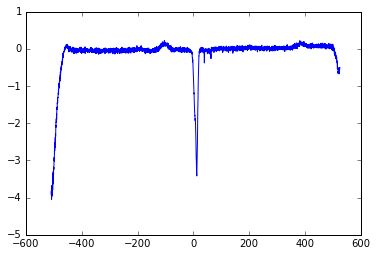

In [99]:
pl.plot(xarr_u, data)

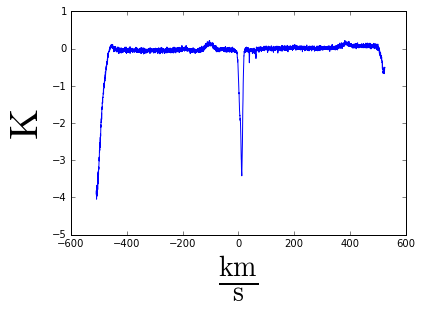

In [101]:
pl.plot(xarr_u, data)
pl.xlabel(xarr_u.unit.to_string(format='latex'), fontsize=40)
pl.ylabel(u.Unit(hdr['BUNIT']).to_string(format='latex'), fontsize=40)

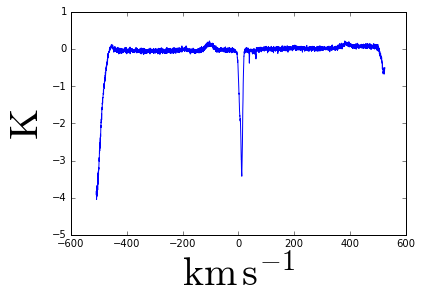

In [103]:
pl.plot(xarr_u, data)
pl.xlabel(xarr_u.unit.to_string(format='latex_inline'), fontsize=40)
pl.ylabel(u.Unit(hdr['BUNIT']).to_string(format='latex'), fontsize=40)

In [105]:
xarr_u.to?

In [106]:
from astropy.wcs import WCS

In [107]:
mywcs = WCS(hdr)

In [108]:
mywcs

WCS Keywords

Number of WCS axes: 1
CTYPE : 'VRAD'  
CRVAL : 7584.5751  
CRPIX : 2049.0  
PC1_1  : 1.0  
CDELT : -252.58830999999998  
NAXIS    : 4096 0

In [139]:
xarr_pixels = np.arange(hdr['NAXIS1'])
xarr_pixels_1_indexed = np.arange(1, hdr['NAXIS1']+1)
# 0 tells you where to start counting:
# 1 for FITS (1,2,3...)
# 0 for python, c, etc. (0,1,2,....)
# 0 or 1 should correspond to the first element of xarr_pixels
xarr_wcs, = mywcs.wcs_pix2world(xarr_pixels, 0)

In [127]:
# CUNIT1, CRVAL1
mywcs.wcs.cunit[0], mywcs.wcs.crval[0]

(Unit("m / s"), 7584.5751)

In [128]:
xarr_wcs_u = xarr_wcs * mywcs.wcs.cunit[0]

In [129]:
xarr_wcs_u

<Quantity [ 524885.43398, 524632.84567, 524380.25736,..., -508958.51885,
           -509211.10716,-509463.69547] m / s>

In [124]:
x, = (1,)

In [125]:
x

1

In [130]:
x,y,z = (1,2,3)

In [131]:
xarr_wcs_u == xarr_u

array([ True, False,  True, ...,  True, False, False], dtype=bool)

In [132]:
xarr_u

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [133]:
xarr_wcs_u

<Quantity [ 524885.43398, 524632.84567, 524380.25736,..., -508958.51885,
           -509211.10716,-509463.69547] m / s>

In [136]:
xarr_u[1], xarr_wcs_u[1]

(<Quantity 524.63284567 km / s>, <Quantity 524632.84567 m / s>)

In [137]:
xarr_u[1] - xarr_wcs_u[1]

<Quantity 1.1368683772161603e-13 km / s>

In [138]:
xarr_wcs_u[1] - xarr_u[1]

<Quantity -1.1641532182693481e-10 m / s>

In [140]:
xarr_wcs_u[0] - xarr_u[0]

<Quantity 0.0 m / s>

In [143]:
np.isclose?

In [144]:
np.abs(xarr_wcs_u-xarr_u) <= (1e-8*u.m/u.s) + 1e-5*np.abs(xarr_u)

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [145]:
np.isclose(xarr_wcs_u, xarr_u, atol=1e-8*u.m/u.s)

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [150]:
all(np.isclose(xarr_wcs_u, xarr_u, atol=1e-8*u.m/u.s))

True

In [155]:
np.min((xarr_wcs_u - xarr_u))

<Quantity -1.1641532182693481e-10 m / s>

In [156]:
all(xarr_wcs_u == xarr_u)

False

In [157]:
np.all(xarr_wcs_u == xarr_u)

False

In [158]:
any(xarr_wcs_u == xarr_u)

True

In [161]:
not_equal = xarr_wcs_u != xarr_u

In [163]:
not_equal

array([ True, False,  True, ...,  True, False, False], dtype=bool)

In [167]:
np.where(not_equal)

(array([   0,    2,    5, ..., 4089, 4090, 4093]),)

In [168]:
np.arange(4096)[not_equal]

array([   0,    2,    5, ..., 4089, 4090, 4093])

In [166]:
len(not_equal), np.count_nonzero(not_equal)

(4096, 2444)

In [162]:
xarr_u[not_equal]

<Quantity [ 524.88543398, 524.38025736, 523.62249243,..., -507.94816561,
           -508.20075392,-508.95851885] km / s>

In [169]:
xarr_u[np.where(not_equal)]

<Quantity [ 524.88543398, 524.38025736, 523.62249243,..., -507.94816561,
           -508.20075392,-508.95851885] km / s>

In [170]:
xarr_u[[1,5,7]]

<Quantity [ 524.63284567, 523.62249243, 523.11731581] km / s>

In [173]:
not_equal.shape, xarr_u[not_equal].shape, np.where(not_equal)[0].shape, xarr_u[np.where(not_equal)].shape

((4096,), (2444,), (2444,), (2444,))

In [177]:
from specutils.io import fits

In [179]:
!which pip

/Users/adam/anaconda/envs/esopython2016/bin/pip


In [ ]:
# pip install https://github.com/astropy/astroquery/archive/master.zip

In [176]:
%%bash
pip install specutils
pip install pyspeckit

  Running setup.py bdist_wheel for pyspeckit: started
  Running setup.py bdist_wheel for pyspeckit: finished with status 'done'
  Stored in directory: /Users/adam/Library/Caches/pip/wheels/71/d8/ec/e6702463cbb41827afeb16f9fcdf0df29a7cf247de7c2fba80
Successfully built pyspeckit


In [180]:
from specutils.io import fits

In [181]:
spec = fits.read_fits_spectrum1d('gbt_1d.fits')

In [186]:
spec

Spectrum1D([-0.50829212, -0.49870891, -0.52269076, ..., -3.81450779,
            -3.85548328, -3.90748133])

In [194]:
import pyspeckit

In [195]:
sp = pyspeckit.Spectrum('gbt_1d.fits')

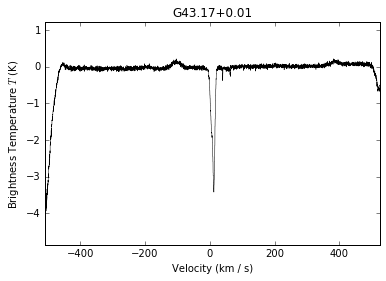

In [196]:
sp.plotter()

# Interpolation # 

Functions for interpolation:

  * `np.interp1d`
  * `scipy.interpolate`
  * `pyspeckit.interpolation`

# Convolution #

 * `np.convolve`
 * `scipy.ndimage.convolve`
 * `astropy.convolution`
 * `pyspeckit.smooth`

# Exercises #

1. Load the ``gbt_1d.fits`` spectrum and plot it

2. Interpolate the spectrum onto a new finer grid from -50 to 50 km/s with 1000 channels

3. Smooth the spectrum by 8 km/s, then interpolate it onto a coarser grid from -400 to 400 km/s with 200 channels

This notebook: https://goo.gl/1AM21P

In [199]:
np.linspace(-50, 50, 101)

array([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40.,
       -39., -38., -37., -36., -35., -34., -33., -32., -31., -30., -29.,
       -28., -27., -26., -25., -24., -23., -22., -21., -20., -19., -18.,
       -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.])